In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_lyon_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Lyon')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/lyon_{date}.csv',index=False)
get_listings_lyon_timeseries()

In [4]:
# pull in detailed_listings
raw_df_lyon = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_lyon)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(lyon_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 8304 AirBnb listings.


In [5]:
lyon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2020-12.csv')
lyon_raw_df_12_12_2020.shape





(11496, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for lyon
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_lyon = glob.glob('lyon/**.csv')
files_lyon

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['lyon/Lyon_2021-08.csv',
 'lyon/Lyon_2021-09.csv',
 'lyon/Lyon_2020-12.csv',
 'lyon/Lyon_2021-02.csv',
 'lyon/Lyon_2021-03.csv',
 'lyon/Lyon_2021-01.csv',
 'lyon/Lyon_2021-04.csv',
 'lyon/Lyon_2021-10.csv',
 'lyon/Lyon_2021-07.csv',
 'lyon/Lyon_2021-06.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

lyon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(lyon_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(lyon_raw_df_12_12_2020['price'].mean(),2)}.")

lyon_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(lyon_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_1_9_2021['price'].mean(),2)}.")

lyon_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(lyon_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_2_8_2021['price'].mean(),2)}.")

lyon_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(lyon_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_3_4_2021['price'].mean(),2)}.")

lyon_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(lyon_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_4_9_2021['price'].mean(),2)}.")

#lyon_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(lyon_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_5_19_2021['price'].mean(),2)}.")

lyon_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(lyon_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_6_3_2021['price'].mean(),2)}.")

lyon_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(lyon_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_7_4_2021['price'].mean(),2)}.")

lyon_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(lyon_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_8_6_2021['price'].mean(),2)}.")

lyon_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(lyon_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_9_7_2021['price'].mean(),2)}.")

lyon_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(lyon_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_10_6_2021['price'].mean(),2)}.")

#lyon_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(lyon_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 11496 AirBnb listings; the avg price is €92.6.
The 1_9_2021 dataset contains 11404 AirBnb listings; the avg price is €92.25.
The 2_8_2021 dataset contains 11376 AirBnb listings; the avg price is €91.55.
The 3_4_2021 dataset contains 11199 AirBnb listings; the avg price is €92.14.
The 4_9_2021 dataset contains 11195 AirBnb listings; the avg price is €92.81.
The 6_3_2021 dataset contains 10985 AirBnb listings; the avg price is €94.23.
The 7_4_2021 dataset contains 10921 AirBnb listings; the avg price is €95.03.
The 8_6_2021 dataset contains 10880 AirBnb listings; the avg price is €94.01.
The 9_7_2021 dataset contains 10420 AirBnb listings; the avg price is €95.03.
The 10_6_2021 dataset contains 8304 AirBnb listings; the avg price is €91.59.


In [8]:
df_list_lyon = [lyon_raw_df_12_12_2020, lyon_raw_df_1_9_2021, lyon_raw_df_2_8_2021,
           lyon_raw_df_3_4_2021, lyon_raw_df_4_9_2021, lyon_raw_df_6_3_2021, lyon_raw_df_7_4_2021,
           lyon_raw_df_8_6_2021, lyon_raw_df_9_7_2021, lyon_raw_df_10_6_2021]

dates_lyon = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_lyon = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_lyon = []

def airbnb_parse_lyon(df_list, files):
    for file in files_lyon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lyon/lyon_{file}.csv")
        print(f"The {file} lyon dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_lyon(df_list, dates):
    for file in files_lyon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lyon/lyon_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_lyon.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_lyon)

lyon_parse = airbnb_parse_lyon(df_list_lyon, files_lyon)


The 2020-12 lyon dataset contains 11496 AirBnb listings -- the avg price is €92.6.
The 2021-01 lyon dataset contains 11404 AirBnb listings -- the avg price is €92.25.
The 2021-02 lyon dataset contains 11376 AirBnb listings -- the avg price is €91.55.
The 2021-03 lyon dataset contains 11199 AirBnb listings -- the avg price is €92.14.
The 2021-04 lyon dataset contains 11195 AirBnb listings -- the avg price is €92.81.
The 2021-06 lyon dataset contains 10985 AirBnb listings -- the avg price is €94.23.
The 2021-07 lyon dataset contains 10921 AirBnb listings -- the avg price is €95.03.
The 2021-08 lyon dataset contains 10880 AirBnb listings -- the avg price is €94.01.
The 2021-09 lyon dataset contains 10420 AirBnb listings -- the avg price is €95.03.
The 2021-10 lyon dataset contains 8304 AirBnb listings -- the avg price is €91.59.


In [9]:
lyon_summary = airbnb_to_frame_lyon(df_list_lyon, files_lyon)
lyon_summary['Date of scrape'] = pd.to_datetime(lyon_summary['Date of scrape'])
lyon_summary['City'] = 'lyon'
lyon_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,11496,92.60,65.0,0,9400,0.83,lyon
1,2021-01-01,11404,92.25,65.0,0,9400,0.83,lyon
2,2021-02-01,11376,91.55,65.0,0,9400,0.82,lyon
3,2021-03-01,11199,92.14,65.0,0,9400,0.83,lyon
4,2021-04-01,11195,92.81,65.0,0,9400,0.82,lyon
5,2021-06-01,10985,94.23,65.0,0,9400,0.82,lyon
6,2021-07-01,10921,95.03,66.0,0,9400,0.85,lyon
7,2021-08-01,10880,94.01,66.0,0,9400,0.90,lyon
8,2021-09-01,10420,95.03,68.0,0,9400,0.92,lyon
9,2021-10-01,8304,91.59,69.0,0,7777,1.09,lyon


In [10]:
master_df_lyon = pd.concat(df_list_lyon)
master_df_lyon_unique = master_df_lyon.drop_duplicates(subset='id')
master_df_lyon_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,56766,Amazing duplex-terrace in old Lyon,269557,Isabelle,NaN,5e Arrondissement,45.76321,4.82911,Entire home/apt,250,14,55,2018-09-04,0.45,1,195,NaN,NaN
1,71455,La Loge des Avocats - Vieux Lyon,365968,Daphné Et Vincent,NaN,5e Arrondissement,45.76206,4.82751,Entire home/apt,80,2,7,2018-11-18,0.12,1,246,NaN,NaN
2,77104,Nice Flat in the center of Lyon,411285,Clementine,NaN,1er Arrondissement,45.76962,4.82750,Entire home/apt,70,2,20,2020-06-30,0.59,1,363,NaN,NaN
3,134539,"Centre of old town,home sweet home",660135,Polali,NaN,5e Arrondissement,45.75930,4.82548,Entire home/apt,60,3,120,2020-09-30,5.32,1,0,NaN,NaN
4,136556,At home near Les Halles Paul Bocuse,668524,Nathalie,NaN,3e Arrondissement,45.76208,4.85327,Entire home/apt,99,3,10,2019-11-03,0.60,1,0,NaN,NaN


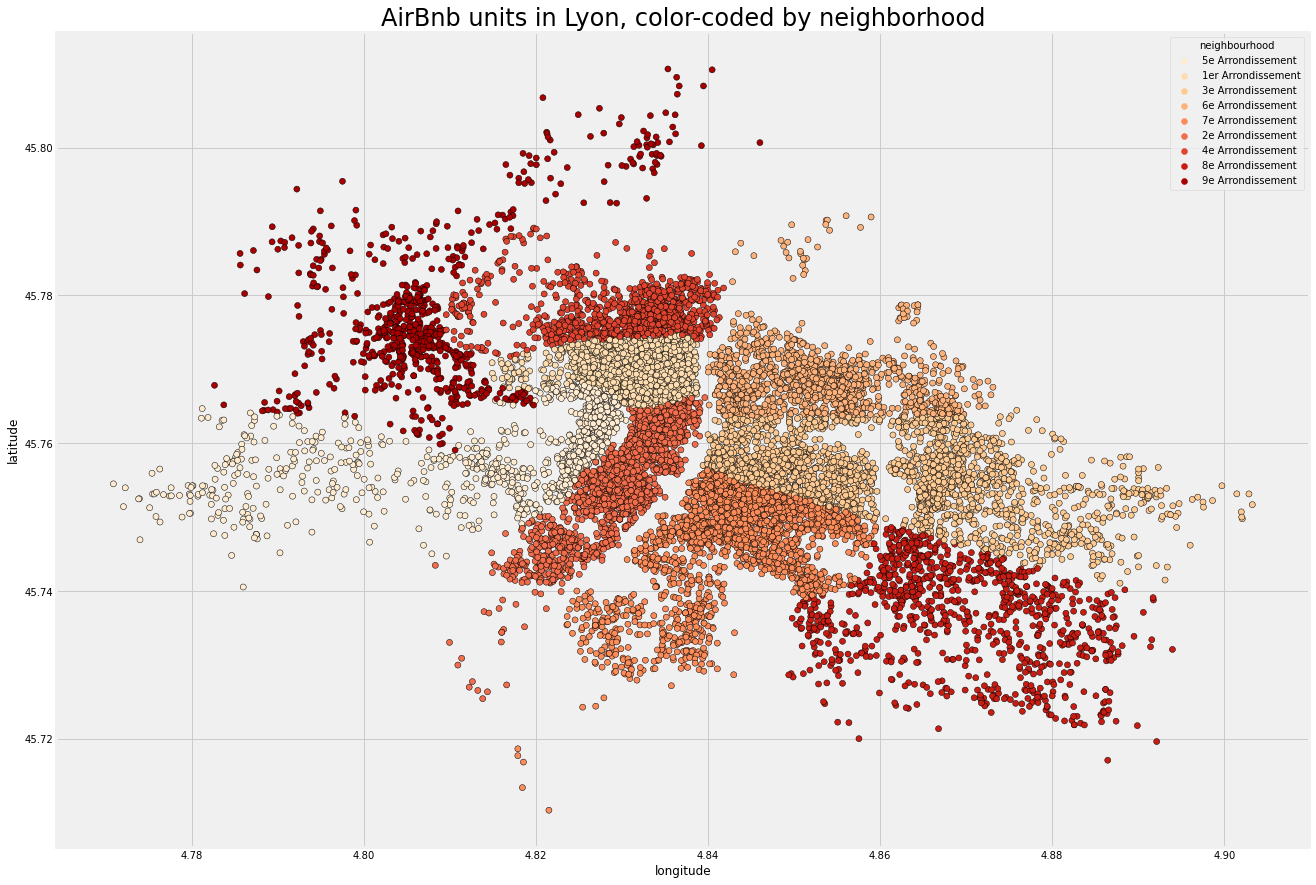

In [11]:
title = 'AirBnb units in Lyon, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_lyon_unique.longitude, master_df_lyon_unique.latitude, hue = master_df_lyon_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_lyon.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([lyon_raw_df_10_6_2021,raw_df_lyon],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,56766,Amazing duplex-terrace in old Lyon,269557,Isabelle,NaN,5e Arrondissement,45.763120,4.828130,Entire home/apt,190,...,4.72,4.70,4.78,4.88,4.86,4.59,f,1,0,0
1,77104,Nice Flat in the center of Lyon,411285,Clementine,NaN,1er Arrondissement,45.768420,4.827450,Entire home/apt,70,...,4.84,4.84,4.95,5.00,4.84,4.89,f,1,0,0
2,136556,At home near Les Halles Paul Bocuse,668524,Nathalie,NaN,3e Arrondissement,45.763460,4.853380,Entire home/apt,99,...,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,0
3,137132,"Bel apartment, 2 rooms, Lyon center",670404,Sandrine,NaN,6e Arrondissement,45.769960,4.853320,Entire home/apt,88,...,5.00,4.89,4.89,4.84,4.95,4.53,f,1,0,0
4,174304,Apartment in the heart of the city,832917,Giuseppina,NaN,1er Arrondissement,45.766950,4.832410,Entire home/apt,139,...,4.75,4.84,4.85,4.83,4.91,4.52,f,2,0,0
5,242183,"Pleasant studio, Monplaisir district, Lyon 3rd",316423644,Luckey,NaN,3e Arrondissement,45.747270,4.866830,Entire home/apt,63,...,4.93,4.73,4.93,5.00,5.00,4.80,f,82,0,0
6,251630,STUDIO 5 MN OPERA LYON FURNISHED,1319577,Emmanuel,NaN,1er Arrondissement,45.770470,4.834133,Entire home/apt,40,...,4.67,4.67,4.67,5.00,5.00,5.00,f,2,0,0
7,298089,triple room in a big flat,1221016,Romain,NaN,3e Arrondissement,45.757750,4.876440,Private room,23,...,4.70,4.56,4.77,4.89,4.52,4.61,f,0,8,0
8,329950,Roomy and luminous apartment,1683652,NATHALIE Et ALAIN,NaN,3e Arrondissement,45.746700,4.870990,Entire home/apt,120,...,4.80,4.60,4.85,4.90,4.75,4.75,f,1,0,0
9,342674,"★SAXE & THE CITY★ 90m², Quiet, Balcony, Clean++ ❤️",1738855,Yoann & Ida,NaN,3e Arrondissement,45.753830,4.847580,Entire home/apt,155,...,4.89,4.80,4.88,4.90,4.74,4.69,t,1,0,0


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -52.89823711507742
Coefficients:  [ 12.37815913  44.45746298  -2.21828351   0.55229294  -6.04996041
   4.62279037  15.06742428  14.19690931 -20.16573668]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
3385,400,78.982780,-321.017220
3657,350,52.454395,-297.545605
6757,345,52.061331,-292.938669
1329,350,65.424816,-284.575184
3866,395,129.349199,-265.650801


<function matplotlib.pyplot.ylim(*args, **kwargs)>

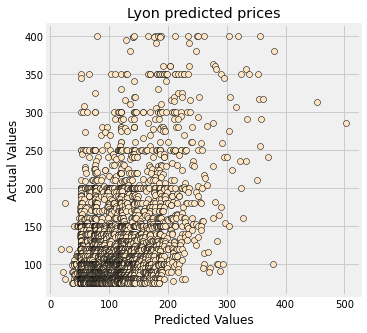

In [19]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Lyon predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim